In [ ]:

import random
import matplotlib.pyplot as plt
import timeit
RELEASE = 1
DEBUG = 0
A_STAR = 2
BFS = 3
DFS = 4
def generate_maze_recursive_backtracking(aX_size, aY_size):
    aWalls = [[[1,1,1,1] for _ in range(aX_size)] for _ in range(aY_size)]
    aVisited_nodes = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    path = [(0,0)]
    aVisited_nodes[0][0] = True

    while path:
        x, y = path[-1]
        possible_directions = []
        if x > 0 and not aVisited_nodes[y][x-1]:
            possible_directions.append((-1, 0, 0, 2))
        if x < aX_size-1 and not aVisited_nodes[y][x+1]:
            possible_directions.append((1, 0, 2, 0))
        if y > 0 and not aVisited_nodes[y-1][x]:
            possible_directions.append((0, -1, 1, 3))   
        if y < aY_size-1 and not aVisited_nodes[y+1][x]:
            possible_directions.append((0, 1, 3, 1))    

        if possible_directions:
            dx, dy, w1, w2 = random.choice(possible_directions)
            nx, ny = x+dx, y+dy
            aWalls[y][x][w1] = 0
            aWalls[ny][nx][w2] = 0
            aVisited_nodes[ny][nx] = True
            path.append((nx, ny))
        else:
            path.pop()
    return aWalls


def draw_maze(aWalls):
    fig, axes = plt.subplots(1, 4, figsize=(30, 10)) #vygeneruje mi to 4 "osy" - prostory, do kterých se mi kreslí jeden graf

    aX_size = len(aWalls[0])
    aY_size = len(aWalls)
    for ax_act in axes:
        for y in range(aY_size):
            for x in range(aX_size):
                left, top, right, bottom = aWalls[y][x]
                x0, x1 = x, x+1
                y0, y1 = aY_size - y, aY_size - (y+1)

                if top: ax_act.plot([x0, x1], [y0, y0], color="black")
                if right: ax_act.plot([x1, x1], [y0, y1], color="black")
                if bottom: ax_act.plot([x0, x1], [y1, y1], color="black")
                if left: ax_act.plot([x0, x0], [y0, y1], color="black")
        ax_act.scatter(0.5,aY_size - 0.5, color = 'hotpink', label = "Start")
        ax_act.scatter(aX_size - 0.5, 0.5, color = 'green', label = "Finish")
        ax_act.set_aspect("equal")
        ax_act.axis("off")
    axes[0].set_title("Empty maze")
    axes[1].set_title("DFS")
    axes[2].set_title("BFS")
    axes[3].set_title("A* (Manhattan)")
    plt.legend(loc = "upper left", 
               ncol = 1,
               bbox_to_anchor = (1,0.5),
               frameon = False)
    plt.show()
    
    return fig, axes


                       


In [27]:
def test1_generating_drawing_maze_recur_backtracking_60x60(aTesting_phase):
    aY_size = 60
    aX_size = 60
    if aTesting_phase == DEBUG:
        print("Test1 start...\n")
        if aX_size != aY_size:
            print("Can not generate a rectangle maze!")
            assert False
        print("Recursive backtracking maze generating algorithm testing start...")
        time_begin = timeit.default_timer()
    aWalls = generate_maze_recursive_backtracking(aX_size, aY_size)
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
        print(f"Four empty mazes successfully generated! {round(delta_t * 1e3, 2)} ms elapsed")
        if aWalls == []:
            print("3D array of walls is empty!")
            assert False
        elif len(aWalls[0]) != 60: #x-ova osa!!!
            print("Bad X-axis length!")
            assert False
        elif len(aWalls) != 60: #y-ova osa!!!
            print("Bad Y-axis length!")
            assert False
        else:
            print("Top edge of maze testing...\n")
        for x in range(60):
            top_idx = 1
            if aWalls[0][x][top_idx] == 0:
                print("Failed to generated maze - top edge is missing!")
                assert False
        print("Left edge of maze testing...\n")
        
        for y in range(60):
            left_idx = 0
            if aWalls[y][0][left_idx] == 0:
                print("Failed to generated maze - left edge is missing!")
                assert False

        print("Right edge of maze testing...\n")
        for y in range(60):
            right_idx = 2
            if aWalls[y][60-1][right_idx] == 0:
                print("Failed to generated maze - right edge is missing!")
                assert False
        print("Bottom edge of maze testing...\n")
        for x in range(60):
            bottom_idx = 1
            if aWalls[0][x][bottom_idx] == 0:
                print("Failed to generated maze - bottom edge is missing!")
                assert False
    if aTesting_phase == DEBUG:
        print(f"Maze drawing algorithm start...")
        time_begin = timeit.default_timer()
    draw_maze(aWalls)
    
    if aTesting_phase == DEBUG:
        time_end = timeit.default_timer()
        delta_t = time_end - time_begin
    #   otestovat body startu a cile, steny okolo.
    #   otestovat, zda je to opravdu 60 x 60
    #   u kresleni prozkoumat, zda je skutecne podle prvni bunky generovano to, co chceme a ne zrcadlove!
        print(f"Four mazes drawing algorithm done! {round(delta_t , 2)} s elapsed\nEnd of the Test1")
    return aWalls


Test1 start...

Recursive backtracking maze generating algorithm testing start...
Four empty mazes successfully generated! 3.98 ms elapsed
Top edge of maze testing...

Left edge of maze testing...

Right edge of maze testing...

Bottom edge of maze testing...

Maze drawing algorithm start...


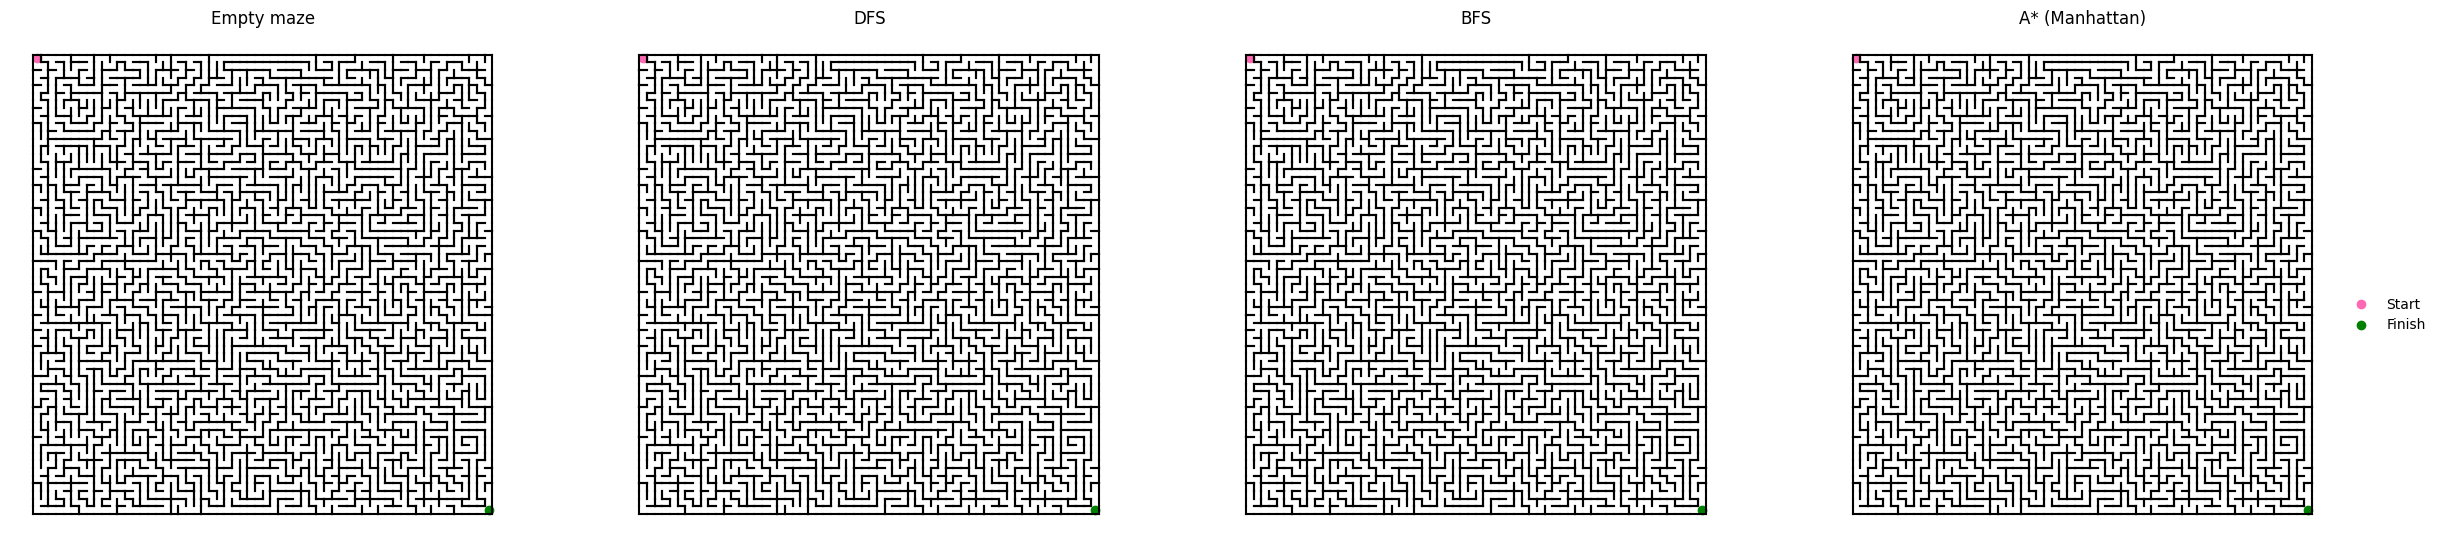

Four mazes drawing algorithm done! 7.62 s elapsed
End of the Test1
[(0, 0), (1, 0), (1, 1), (2, 1), (2, 0), (3, 0), (3, 1), (4, 1), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (7, 0), (8, 0), (8, 1), (9, 1), (10, 1), (11, 1), (11, 0), (12, 0), (13, 0), (14, 0), (14, 1), (15, 1), (15, 0), (16, 0), (16, 1), (17, 1), (18, 1), (18, 0), (19, 0), (19, 1), (20, 1), (21, 1), (21, 0), (22, 0), (22, 1), (23, 1), (23, 2), (24, 2), (25, 2), (25, 3), (25, 4), (25, 5), (24, 5), (23, 5), (22, 5), (22, 6), (23, 6), (23, 7), (23, 8), (23, 9), (22, 9), (21, 9), (21, 8), (21, 7), (20, 7), (19, 7), (18, 7), (18, 8), (18, 9), (19, 9), (19, 10), (19, 11), (20, 11), (21, 11), (21, 12), (20, 12), (19, 12), (18, 12), (17, 12), (16, 12), (16, 11), (17, 11), (18, 11), (18, 10), (17, 10), (17, 9), (16, 9), (15, 9), (15, 8), (15, 7), (15, 6), (15, 5), (16, 5), (16, 4), (15, 4), (14, 4), (14, 5), (13, 5), (12, 5), (12, 4), (13, 4), (13, 3), (12, 3), (12, 2), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 7)

In [ ]:
def maze_bfs_search(aWalls, aStart, aGoal):
    from collections import deque
    aX_size = len(aWalls[0]) #aWalls je pole [y][x]
    aY_size = len(aWalls)
    aNodes_visited = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    aNodes_visited[aStart[0]][aStart[1]] = True
    aParents = {} #záznam v podobe slovniku, odkud jsi přišel
    direction_vectors = [(0,-1), (-1, 0), (0, 1), (1, 0)] #list tuplů - nesmi se po vytvoreni jiz menit!
    #fronta
    aQueue = deque([aStart])
    while aQueue:
        (aY, aX) = aQueue.popleft()
        if (aY, aX) == aGoal:
            aBFS_path = []
            while (aY, aX) != aStart:
                aBFS_path.append((aY, aX))
                (aY, aX) = aParents[(aY, aX)] #podivej se, odkud jsi prisel, uloz to 
            aBFS_path.append((aStart))
            return aBFS_path[::-1], aNodes_visited #vrati mi cestu obracene - od acatku pos start
           
        
        for i, (dy, dx) in enumerate(direction_vectors):
            if direction_vectors != [(0,-1), (-1, 0), (0, 1), (1, 0)]:
                print("Directions vectors (y, x) does not make any sense - list of tupples not matching [(0,-1), (-1, 0), (0, 1), (1, 0)]!")
                assert False #pokud nekdo zadal zvenku zadal nesmysl
            if aWalls[aY][aX][i] == 0:
                    newY, newX  = aY + dy, aX + dx
                    if not aNodes_visited[newY][newX]:
                        aNodes_visited[newY][newX] = True
                        aParents[(newY, newX)] = (aY, aX)
                        aQueue.append((newY, newX))
    print("Given maze can not be solved!")
    assert False
def draw_path(aPath, aFig, aAxes, aNodes_visited, aAlgorithm):
    if aAlgorithm == BFS:
        #aX_size --- len(aNodes[0]) -> nodes[y][x]
        aY_size = len(aNodes_visited)
        for y in range(aNodes_visited):
            for x in range(aNodes_visited[0]):
                if aNodes_visited[y][x] == True:
                    aAxes[2].scatter(x + 0.5, aY_size - (y + 0.5))
def main():
    walls = test1_generating_drawing_maze_recur_backtracking_60x60(DEBUG)
    path, nodes_visited = maze_bfs_search(walls, (0,0), (59,59))
    print(path)
if __name__ == "__main__":
    main()


